In [5]:
import numpy as np

import tensorflow as tf;

import matplotlib.pyplot as plt

from dataset import load_x_test, load_y_test
# ignore I / W messages.

In [6]:
x_test = load_x_test()
y_test = load_y_test()

In [7]:
targetModel = 'test'
modelLoad = tf.keras.models.load_model(f'model/{targetModel}.keras')

test = np.reshape(x_test.values, (x_test.shape[0], 28,28))


1/1 [==============================] - 0s 14ms/step


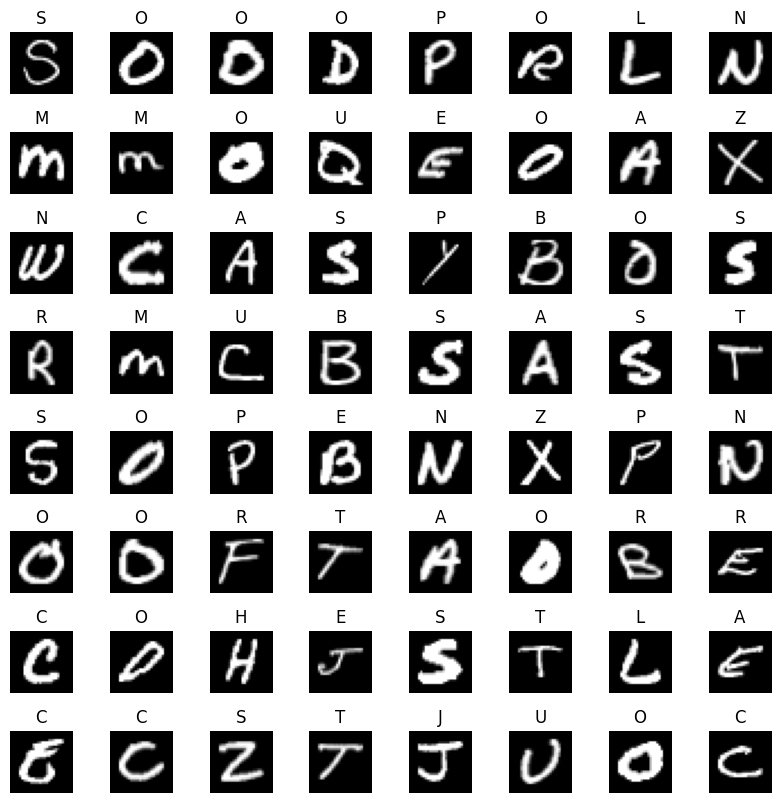

In [8]:
alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

m,n = x_test.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)


# Labels are Predictions from the model.
for i,ax in enumerate(axes.flat):

    i = np.random.randint(m)

    ax.imshow(test[i], cmap='gray')
    
    predict = modelLoad.predict(test[i].reshape(1,784))
    
    ax.set_title(alphabets[np.argmax(predict)])
    ax.set_axis_off()
    